# **Multiple Linear Regression**

In [3]:
import  pandas as pd

url = 'https://raw.githubusercontent.com/jeffprosise/Machine-Learning/master/Data/pacific-heights.csv'
df = pd.read_csv(url)
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [4]:
df.shape

(439, 13)

In [5]:
corr_matrix = df.corr()
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.840864
bathrooms        0.768179
totalrooms       0.670726
bedrooms         0.606579
zipcode          0.296032
latitude         0.126480
yearbuilt       -0.214365
longitude       -0.309462
Name: lastsoldprice, dtype: float64

In [6]:
df = pd.get_dummies(df, columns=['usecode'])
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,yearbuilt,zipcode,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,1900,94109,1,0,0,0,0,0
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,1961,94109,1,0,0,0,0,0
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,1987,94109,1,0,0,0,0,0
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,1924,94109,1,0,0,0,0,0
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,2012,94109,1,0,0,0,0,0


In [7]:
corr_matrix = df.corr()
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice              1.000000
finishedsqft               0.840864
bathrooms                  0.768179
totalrooms                 0.670726
usecode_SingleFamily       0.638482
bedrooms                   0.606579
zipcode                    0.296032
latitude                   0.126480
usecode_Duplex             0.006292
usecode_MultiFamily2To4   -0.019009
usecode_Townhouse         -0.025467
usecode_Cooperative       -0.025556
yearbuilt                 -0.214365
longitude                 -0.309462
usecode_Condominium       -0.598575
Name: lastsoldprice, dtype: float64

In [8]:
# Filter the dataset down to the most significance columns
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode_Condominium', 'usecode_SingleFamily', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode_Condominium,usecode_SingleFamily,lastsoldprice
0,2.0,2,1463,7,1,0,1950000
1,3.5,3,3291,7,1,0,4200000
2,1.0,1,653,3,1,0,665000
3,2.5,2,2272,6,1,0,2735000
4,1.0,1,837,3,1,0,1050000


In [9]:
corr_matrix = df.corr()
corr_matrix['lastsoldprice'].sort_values(ascending=False)

lastsoldprice           1.000000
finishedsqft            0.840864
bathrooms               0.768179
totalrooms              0.670726
usecode_SingleFamily    0.638482
bedrooms                0.606579
usecode_Condominium    -0.598575
Name: lastsoldprice, dtype: float64

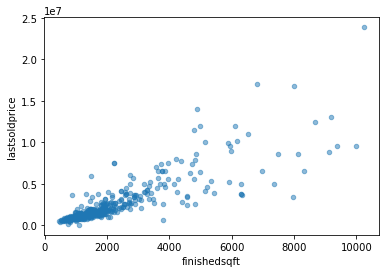

In [10]:
%matplotlib inline

df.plot(kind='scatter', x='finishedsqft', y='lastsoldprice', alpha=0.5);

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop('lastsoldprice', axis=1)
y = df['lastsoldprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [12]:
# Compute the model's R2 score
LR.score(X_test, y_test)

0.5519315054785503

In [13]:
# Compute R2 scores across five folds
from sklearn.model_selection import cross_val_score

cross_val_score(LR, X, y, cv=5)

array([0.66491085, 0.69719329, 0.68235048, 0.6180378 , 0.76483264])

In [14]:
# Compute the mean R2 score across five folds
cross_val_score(LR, X, y, cv=5).mean()

0.685465012522061